# Weeks 5 & 6 Milestone #3

- Joshua Burden
- Bellevue University
- DSC540 Data Preparation
- Cathrine Williams
- 07/17/2022


In [2]:
import requests
import os
import urllib.request
import urllib.parse
from urllib.error import HTTPError,URLError
from bs4 import BeautifulSoup
import json
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
import requests

url = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php"

headers = {
	"X-RapidAPI-Key": "323c11e491msh2603d7c67045fccp1cf0a3jsn725ee529182e",
	"X-RapidAPI-Host": "coronavirus-monitor.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

print(response.text)
sponse_content = response.content.decode(response.encoding)
response_json = json.loads(response_content)


{"message":"You are not subscribed to this API."}


### First Transformation 

add the data to a dataframe

In [55]:
country_data_dict = {'country_name':[],
  'cases':[],
  'deaths':[],
  'region':[],
  'total_recovered':[],
  'new_deaths':[],
  'new_cases':[],
  'serious_critical':[],
  'active_cases':[],
  'total_cases_per_1m_population':[],
  'deaths_per_1m_population':[],
  'total_tests':[],
  'tests_per_1m_population':[]}

In [56]:
cntry_stats_list = response_json['countries_stat']

In [57]:
#Formatting data into Readable format
for cntry_stats in cntry_stats_list:
    for k,v in cntry_stats.items():
        country_data_dict[k].append(v)
        

In [61]:
covid_df = pd.DataFrame(country_data_dict)        

In [68]:
covid_df.head()

,country_name,cases,deaths,region,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,"82,649,779","1,018,316",,"80,434,925",0,0,"1,465","1,196,538","247,080","3,044","1,000,275,726","2,990,303"
1,India,"43,057,545","522,193",,"42,519,479",0,0,698,"15,873","30,657",372,"834,717,702","594,319"
2,Brazil,"30,345,654","662,663",,"29,364,400",0,0,"8,318","318,591","140,954","3,078","63,776,166","296,238"
3,France,"28,244,977","145,020",,"25,852,832",0,0,"1,677","2,247,125","430,996","2,213","266,484,045","4,066,333"
4,Germany,"24,109,433","134,624",,"21,243,000",0,0,"1,980","2,731,809","286,106","1,598","122,332,384","1,451,714"


### Second Transformation
rename the data headers

In [63]:
covid_df1= covid_df.rename(columns={
    'country_name':'Name of Country',
    'cases':'# of Cases',
    'deaths':'# of Deaths',
    'region':'Region',
    'total_recovered':'Total Recovered',
    'new_deaths':'New Deaths',
    'new_cases':'New Cases',
    'serious_critical':'Seriously Critical',
    'active_cases':'Active Cases',
    'total_cases_per_1m_population':'Total Cases Per Mill',
    'deaths_per_1m_population':'Total Deaths Per Mill',
    'tests_per_1m_population':'Total Tests per Mill'
})

In [69]:
covid_df1

,Name of Country,# of Cases,# of Deaths,Region,Total Recovered,New Deaths,New Cases,Active Cases,Total Cases Per Mill,Total Deaths Per Mill,total_tests,Total Tests per Mill
0,USA,"82,649,779","1,018,316",,"80,434,925",0,0,"1,196,538","247,080","3,044","1,000,275,726","2,990,303"
1,India,"43,057,545","522,193",,"42,519,479",0,0,"15,873","30,657",372,"834,717,702","594,319"
2,Brazil,"30,345,654","662,663",,"29,364,400",0,0,"318,591","140,954","3,078","63,776,166","296,238"
3,France,"28,244,977","145,020",,"25,852,832",0,0,"2,247,125","430,996","2,213","266,484,045","4,066,333"
4,Germany,"24,109,433","134,624",,"21,243,000",0,0,"2,731,809","286,106","1,598","122,332,384","1,451,714"
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Niue,8,0,,7,0,0,1,"4,860",0,0,0
224,Nauru,3,0,,3,0,0,0,274,0,0,0
225,Saint Helena,2,0,,2,0,0,0,327,0,0,0
226,Micronesia,1,0,,1,0,0,0,9,0,0,0


### Third Tranformation
Drop some headers

In [70]:
covid_df1.drop(labels=['Seriously Critical'],axis=1,inplace=True)
covid_df1.drop(labels=['Total Tests per Mill'],axis=1,inplace=True)
covid_df1.drop(labels=['Total Recovered'],axis=1,inplace=True)

KeyError: "['Seriously Critical'] not found in axis"

In [71]:
covid_df1.head()

,Name of Country,# of Cases,# of Deaths,Region,Total Recovered,New Deaths,New Cases,Active Cases,Total Cases Per Mill,Total Deaths Per Mill,total_tests,Total Tests per Mill
0,USA,"82,649,779","1,018,316",,"80,434,925",0,0,"1,196,538","247,080","3,044","1,000,275,726","2,990,303"
1,India,"43,057,545","522,193",,"42,519,479",0,0,"15,873","30,657",372,"834,717,702","594,319"
2,Brazil,"30,345,654","662,663",,"29,364,400",0,0,"318,591","140,954","3,078","63,776,166","296,238"
3,France,"28,244,977","145,020",,"25,852,832",0,0,"2,247,125","430,996","2,213","266,484,045","4,066,333"
4,Germany,"24,109,433","134,624",,"21,243,000",0,0,"2,731,809","286,106","1,598","122,332,384","1,451,714"


### Fourth Transformation
Check for null values

In [72]:
covid_df1.isnull().sum()

Name of Country          0
# of Cases               0
# of Deaths              0
Region                   0
Total Recovered          0
New Deaths               0
New Cases                0
Active Cases             0
Total Cases Per Mill     0
Total Deaths Per Mill    0
total_tests              0
Total Tests per Mill     0
dtype: int64

### Fifth Transformation
Look for outliers 

In [90]:
covid_df1.describe()

,Name of Country,# of Cases,# of Deaths,Region,Total Recovered,New Deaths,New Cases,Active Cases,Total Cases Per Mill,Total Deaths Per Mill,total_tests,Total Tests per Mill
count,228,228,228,228,228,228,228,228,228,228,228,228
unique,228,228,213,1,212,16,35,197,227,204,213,213
top,USA,"82,649,779",0,,N/A,0,0,N/A,0,0,0,0
freq,1,1,9,228,15,207,194,15,2,11,16,16


Text(0.5, 1.0, 'Cases to Deaths')

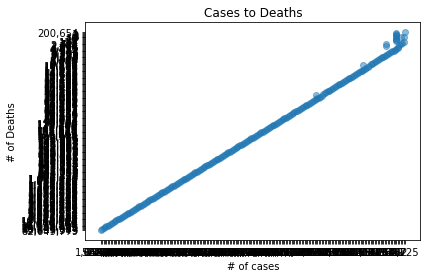

In [99]:
plt.scatter(covid_df1['# of Deaths'],covid_df1['# of Cases'],  alpha=0.5)
plt.xlabel('# of cases')
plt.ylabel('# of Deaths')
plt.title('Cases to Deaths')